<a href="https://colab.research.google.com/github/Feliperojas2601/MetNumUN2022II/blob/main/Lab2/jrojasce_ScottsSanderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2
Por: Felipe Rojas Cendales  
UNAL | Metódos númericos

In [25]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 32.8 MB/s 


In [26]:
%matplotlib inline

%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [74]:
assert ran_the_first_cell, "Oh noes!"

In [75]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [76]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [77]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [78]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [79]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [80]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [81]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [82]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [83]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

**My own example 1**

In [ ]:
C = [[10, 23, 33],
     [21, 36, 45],
     [55, 67, 78]]

D = [[12, 26, 37],
     [28, 38, 49], 
     [76, 56, 98]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time
matmul(a, b)

CPU times: user 35 µs, sys: 6 µs, total: 41 µs
Wall time: 45.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 2**

In [ ]:
%%time
matmul(C, D)

CPU times: user 23 µs, sys: 3 µs, total: 26 µs
Wall time: 29.6 µs


[[3272, 2982, 4731], [4680, 4434, 6951], [8464, 8344, 12962]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.06320147869601112, 0.4939457599092463, 0.8679157038084483],
 [0.715252321881343, 0.7731903932515432, 0.6938673877035221]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.16 s, sys: 37.6 ms, total: 9.2 s
Wall time: 9.22 s


**My own example 3**

In [ ]:
%%time
randC = random_matrix(300, 300)
randD = random_matrix(300, 300)
x = matmul(randa, randb)

CPU times: user 9.08 s, sys: 30.9 ms, total: 9.11 s
Wall time: 9.11 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

**My own example 4**

In [ ]:
list_data_2 = [float(j) for j in range(300000)]
array_data_2 = np.array(list_data_2)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 15.3 ms, sys: 1.01 ms, total: 16.3 ms
Wall time: 17.5 ms


333328333350000.0

**My own example 5**

In [ ]:
%%time
python_dot_product(list_data_2, list_data_2)

CPU times: user 30 ms, sys: 0 ns, total: 30 ms
Wall time: 36.3 ms


8999955000050000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 187 µs, sys: 5 µs, total: 192 µs
Wall time: 200 µs


333328333350000.0

**My own example 6**

In [ ]:
%%time
fortran_dot_product(array_data_2, array_data_2)

CPU times: user 538 µs, sys: 0 ns, total: 538 µs
Wall time: 553 µs


8999955000050000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

**My own example 7**

In [ ]:
mul_elemwise([4, 3, 2, 1], [True, 1j, 'Double', False])

[4, 3j, 'DoubleDouble', 0]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


**My own example 8**

In [ ]:
source_code_2 = 'a * False'
bytecode = compile(source_code_2, '', 'eval')
dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_CONST               0 (False)
              4 BINARY_MULTIPLY
              6 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**My own example 9**

In [ ]:
data2 = np.array([5,300,42])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.07 ms


333328333350000.0

**My own example 10**

In [ ]:
%%time
(array_data_2 * array_data_2).sum()

CPU times: user 2.44 ms, sys: 2.02 ms, total: 4.46 ms
Wall time: 3.12 ms


8999955000050000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 427 µs, sys: 2.99 ms, total: 3.42 ms
Wall time: 1.79 ms


333328333350000.0

**My own example 11**

In [ ]:
%%time
array_data_2.dot(array_data_2)

CPU times: user 718 µs, sys: 0 ns, total: 718 µs
Wall time: 382 µs


8999955000050000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 196 µs, sys: 8 µs, total: 204 µs
Wall time: 212 µs


333328333350000.0

**My own example 12**

In [ ]:
%%time
fortran_dot_product(array_data_2, array_data_2)

CPU times: user 615 µs, sys: 0 ns, total: 615 µs
Wall time: 637 µs


8999955000050000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.9573363488548717

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Mean:
[5. 6. 7. 8. 9.]
Data - Mean:
[[-5. -5. -5. -5. -5.]
 [ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: ignored

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

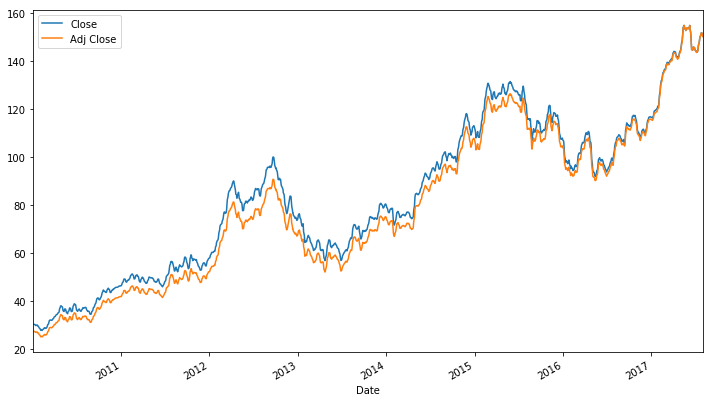

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

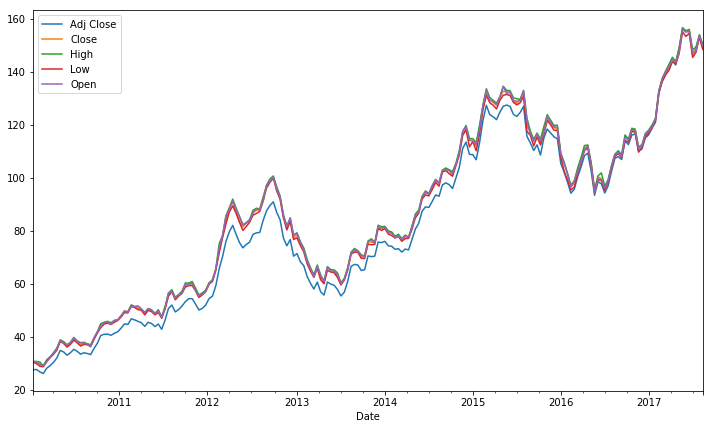

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

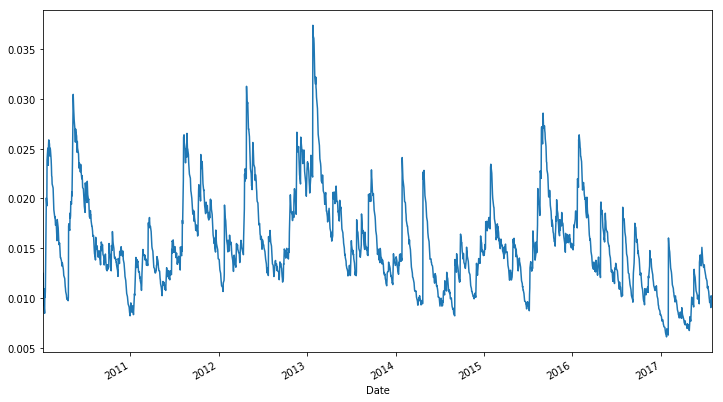

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
avocados = read_avocadata('2014', '2016')
avocados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: The default value of regex will change from True to False in a future version.


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

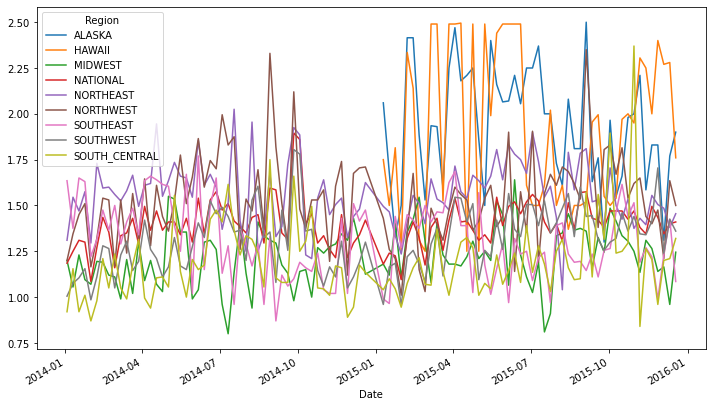

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

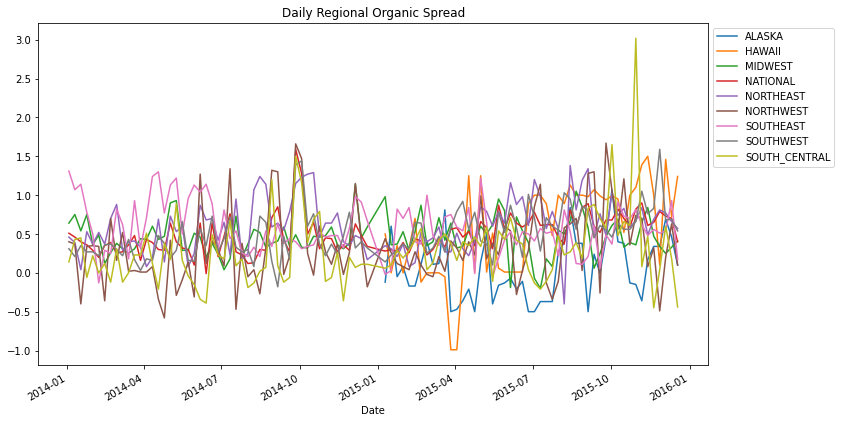

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


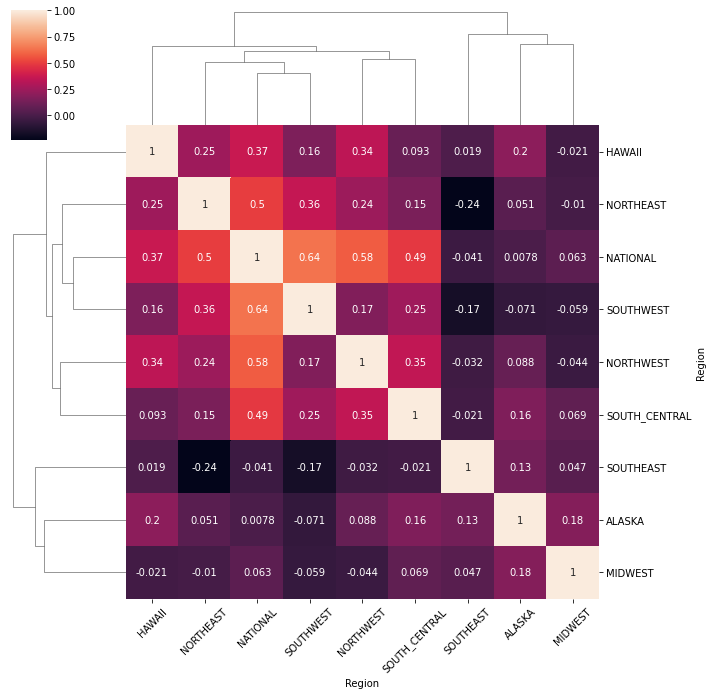

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Matrix Multiplication and other programming languages

4. run C,C++, Java Script and Java programs and run matrix multiplications and measure the time in each lenguaje for similar matices than the ones run before. 


**My own example 13**

In [ ]:
C = [[10, 23, 33],
     [21, 36, 45],
     [55, 67, 78]]

D = [[12, 26, 37],
     [28, 38, 49], 
     [76, 56, 98]]

In [ ]:
#Python Matrix multiplication 
%%time
matmul(C, D)

CPU times: user 55 µs, sys: 4 µs, total: 59 µs
Wall time: 65.1 µs


[[3272, 2982, 4731], [4680, 4434, 6951], [8464, 8344, 12962]]

**My own example 14**

In [ ]:
%%writefile tmpc.c

#include<stdio.h>    
#include<stdlib.h>  

int main(){  

  int C[3][3] = {{10,23,33}, {21,36,45}, {55,67,78}}; 
  int D[3][3] = {{12, 26, 3}, {28, 38, 49}, {76, 56, 98}};
  int mul[3][3];
  int r = 3;
  int c = 3; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += C[i][k] * D[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      printf("%d\t",mul[i][j]);    
    }    
    printf("\n");    
  }    

  return 0;  

}  

Overwriting tmpc.c


In [ ]:
#C matrix multiplication
%%time
!gcc tmpc.c -o tmpc
!./tmpc

3272	2982	4391	
4680	4434	6237	
8464	8344	11092	
CPU times: user 11.8 ms, sys: 16.9 ms, total: 28.7 ms
Wall time: 246 ms


**My own example 15**

In [ ]:
%%writefile tmpcc.cc
#include <iostream>
using namespace std;

int main() {
  int C[3][3] = {{10,23,33}, {21,36,45}, {55,67,78}}; 
  int D[3][3] = {{12, 26, 3}, {28, 38, 49}, {76, 56, 98}};
  int mul[3][3];
  int r = 3;
  int c = 3; 
  int i, j, k;      
      
  //matMulCpp
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += C[i][k] * D[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i = 0; i < r; ++i) {
    for(j = 0; j < c; ++j) {
        cout << " " << mul[i][j];
        if(j == c-1) {
          cout << endl;
        }
    }
  }
	return 0;
}

Writing tmpcc.cc


In [ ]:
#C++ matrix multiplication
%%time
!g++ tmpcc.cc -o tmpcc
!./tmpcc

 3272 2982 4391
 4680 4434 6237
 8464 8344 11092
CPU times: user 19 ms, sys: 18.5 ms, total: 37.5 ms
Wall time: 856 ms


**My own example 16**

In [ ]:
%%writefile tmp.js
var C = [[10, 23, 33], [21, 36, 45], [55, 67, 78]]; 
var D = [[12, 26, 3], [28, 38, 49], [76, 56, 98]]; 

var mul = [];
for (var i = 0; i < C.length; i++) {
    mul[i] = [];
    for (var j = 0; j < D[0].length; j++) {
        var sum = 0;
        for (var k = 0; k < C[0].length; k++) {
            sum += C[i][k] * D[k][j];
        }
        mul[i][j] = sum;
    }
}

for (var r = 0; r < mul.length; r++) {
    console.log(mul[r]);
}

Overwriting tmp.js


In [ ]:
#Js matrix multiplication 
%%time
!node tmp.js

[ 3272, 2982, 4391 ]
[ 4680, 4434, 6237 ]
[ 8464, 8344, 11092 ]
CPU times: user 7.2 ms, sys: 12.4 ms, total: 19.6 ms
Wall time: 131 ms


**My own example 17**

In [ ]:
%%writefile Main.java

class Main {

  public static void main(String[] args) {
    
    int C[][] = {{10, 23, 33}, {21, 36, 45}, {55, 67, 78}};    
    int D[][] = {{12, 26, 3}, {28, 38, 49}, {76, 56, 98}};    
       
    int mul[][] = new int[3][3];    
            
    for(int i = 0; i < 3; i++) {    
      for(int j = 0; j < 3; j++) {    
        int sum = 0;      
        for(int k = 0; k < 3; k++) {      
          sum += C[i][k] * D[k][j];      
        }
        mul[i][j] = sum; 
        System.out.print(mul[i][j] + " ");   
      } 
      System.out.println();
    }
  }
}

Overwriting Main.java


In [ ]:
#Java matrix multiplication 
%%time
!javac Main.java
!java Main

3272 2982 4391 
4680 4434 6237 
8464 8344 11092 
CPU times: user 23.8 ms, sys: 21.3 ms, total: 45.1 ms
Wall time: 1.27 s


# Matrix Multiplication averages
5. Run all the codes of matrix multiplication in all languages (Py, C, C++, JS, Java) for 10 similar matrices than the ones run before (5 different programs). Build a data frame with the average times and the speed factor respect to the language that is faster.


**My own example 18**

Python average

In [ ]:
#Python average
C = [[10, 23, 33],
     [21, 36, 45],
     [55, 67, 78]]

D = [[12, 26, 37],
     [28, 38, 49], 
     [76, 56, 98]]

E = [[10, 23],
     [21, 36]]

F = [[28, 38, 49], 
     [76, 56, 98]]

G = [[1.0, 2.0],
     [3.0, 4.0]]

H = [[5.0, 6.0],
     [7.0, 8.0]]

I = [[21, 36, 45]]

K = [[35.56], 
     [78.90], 
     [88.12]]

L = [[55, 67, 78, 25],
     [55, 67, 78, 25],
     [55, 67, 78, 25], 
     [55, 67, 78, 25]]

M = [[28, 38, 49, 89],
     [28, 38, 49, 89],
     [28, 38, 49, 89], 
     [28, 38, 49, 89]]

In [ ]:
#Python Matrix multiplication 
%%time
matmul(C, D)

CPU times: user 42 µs, sys: 4 µs, total: 46 µs
Wall time: 52.5 µs


[[3272, 2982, 4731], [4680, 4434, 6951], [8464, 8344, 12962]]

In [ ]:
#Python Matrix multiplication 
%%time
matmul(E, F)

CPU times: user 29 µs, sys: 3 µs, total: 32 µs
Wall time: 36.7 µs


[[2028, 1668, 2744], [3324, 2814, 4557]]

In [ ]:
#Python Matrix multiplication 
%%time
matmul(G, H)

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 46.5 µs


[[19.0, 22.0], [43.0, 50.0]]

In [ ]:
#Python Matrix multiplication 
%%time
matmul(I, K)

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 47.4 µs


[[7552.5599999999995]]

In [ ]:
#Python Matrix multiplication 
%%time
matmul(L, M)

CPU times: user 51 µs, sys: 5 µs, total: 56 µs
Wall time: 62.2 µs


[[6300, 8550, 11025, 20025],
 [6300, 8550, 11025, 20025],
 [6300, 8550, 11025, 20025],
 [6300, 8550, 11025, 20025]]

In [ ]:
python_average = (0.046 + 0.032 + 0.042 + 0.037 + 0.056)/5
python_average

0.0426

C average

In [ ]:
%%writefile tmpc.c

#include<stdio.h>    
#include<stdlib.h>  

int main(){  

  int C[3][3] = {{10,23,33}, {21,36,45}, {55,67,78}}; 
  int D[3][3] = {{12, 26, 3}, {28, 38, 49}, {76, 56, 98}};
  int mul[3][3];
  int r = 3;
  int c = 3; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += C[i][k] * D[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      printf("%d\t",mul[i][j]);    
    }    
    printf("\n");    
  }    

  return 0;  

}

Overwriting tmpc.c


In [ ]:
%%time
!gcc tmpc.c -o tmpc
!./tmpc

3272	2982	4391	
4680	4434	6237	
8464	8344	11092	
CPU times: user 11 ms, sys: 19.8 ms, total: 30.7 ms
Wall time: 253 ms


In [ ]:
%%writefile tmpc.c

#include<stdio.h>    
#include<stdlib.h>  

int main(){  

  int E[2][2] = {{10,23}, {21,36}}; 
  int F[2][3] = {{28, 38, 49}, {76, 56, 98}};
  int mul[2][3];
  int r = 2;
  int c = 3; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<2;k++) {    
        mul[i][j] += E[i][k] * F[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      printf("%d\t",mul[i][j]);    
    }    
    printf("\n");    
  }    

  return 0;  

}

Overwriting tmpc.c


In [ ]:
%%time
!gcc tmpc.c -o tmpc
!./tmpc

2028	1668	2744	
3324	2814	4557	
CPU times: user 9.61 ms, sys: 20 ms, total: 29.6 ms
Wall time: 257 ms


In [ ]:
%%writefile tmpc.c

#include<stdio.h>    
#include<stdlib.h>  

int main(){  

  float G[2][2] = {{1.0, 2.0}, {3.0, 4.0}}; 
  float H[2][2] = {{5.0, 6.0}, {7.0, 8.0}};
  float mul[2][2];
  int r = 2;
  int c = 2; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += G[i][k] * H[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      printf("%f\t",mul[i][j]);    
    }    
    printf("\n");    
  }    

  return 0;  

}

Overwriting tmpc.c


In [ ]:
%%time
!gcc tmpc.c -o tmpc
!./tmpc

19.000000	22.000000	
43.000000	50.000000	
CPU times: user 12.7 ms, sys: 25 ms, total: 37.8 ms
Wall time: 262 ms


In [ ]:
%%writefile tmpc.c

#include<stdio.h>    
#include<stdlib.h>  

int main(){  

  int I[1][3] = {{21, 36, 35}}; 
  float K[3][1] = {{35.56}, {78.90}, {88.12}};
  float mul[1][1];
  int r = 1;
  int c = 1; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<3;k++) {    
        mul[i][j] += I[i][k] * K[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      printf("%f\t",mul[i][j]);    
    }    
    printf("\n");    
  }    

  return 0;  

}

Overwriting tmpc.c


In [ ]:
%%time
!gcc tmpc.c -o tmpc
!./tmpc

6671.360352	
CPU times: user 15.4 ms, sys: 18.5 ms, total: 33.9 ms
Wall time: 254 ms


In [ ]:
%%writefile tmpc.c

#include<stdio.h>    
#include<stdlib.h>  

int main(){  

  int L[4][4] = {{55, 67, 78, 25}, {55, 67, 78, 25}, {55, 67, 78, 25}, {55, 67, 78, 25}}; 
  int M[4][4] = {{28, 38, 49, 89}, {28, 38, 49, 89}, {28, 38, 49, 89}, {28, 38, 49, 89}};
  int mul[4][4];
  int r = 4;
  int c = 4; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += L[i][k] * M[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      printf("%d\t",mul[i][j]);    
    }    
    printf("\n");    
  }    

  return 0;  

}

Overwriting tmpc.c


In [ ]:
%%time
!gcc tmpc.c -o tmpc
!./tmpc

6300	8550	11025	20025	
6300	8550	11025	20025	
6300	8550	11025	20025	
6300	8550	11025	20025	
CPU times: user 14.5 ms, sys: 19.7 ms, total: 34.3 ms
Wall time: 249 ms


In [ ]:
c_average = (30.7 + 29.6 + 37.8 + 33.9 + 34.3)/5
c_average

33.260000000000005

C++ average

In [ ]:
%%writefile tmpcc.cc
#include <iostream>
using namespace std;

int main() {
  int C[3][3] = {{10,23,33}, {21,36,45}, {55,67,78}}; 
  int D[3][3] = {{12, 26, 3}, {28, 38, 49}, {76, 56, 98}};
  int mul[3][3];
  int r = 3;
  int c = 3; 
  int i, j, k;      
      
  //matMulCpp
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += C[i][k] * D[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i = 0; i < r; ++i) {
    for(j = 0; j < c; ++j) {
        cout << " " << mul[i][j];
        if(j == c-1) {
          cout << endl;
        }
    }
  }
	return 0;
}

Overwriting tmpcc.cc


In [ ]:
%%time
!g++ tmpcc.cc -o tmpcc
!./tmpcc

 3272 2982 4391
 4680 4434 6237
 8464 8344 11092
CPU times: user 12.2 ms, sys: 25.9 ms, total: 38.2 ms
Wall time: 545 ms


In [ ]:
%%writefile tmpcc.cc
#include <iostream>
using namespace std;

int main() {
  
  int E[2][2] = {{10,23}, {21,36}}; 
  int F[2][3] = {{28, 38, 49}, {76, 56, 98}};
  int mul[2][3];
  int r = 2;
  int c = 3; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<2;k++) {    
        mul[i][j] += E[i][k] * F[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i = 0; i < r; ++i) {
    for(j = 0; j < c; ++j) {
        cout << " " << mul[i][j];
        if(j == c-1) {
          cout << endl;
        }
    }
  }
	return 0;
}

Overwriting tmpcc.cc


In [ ]:
%%time
!g++ tmpcc.cc -o tmpcc
!./tmpcc

 2028 1668 2744
 3324 2814 4557
CPU times: user 13.3 ms, sys: 24.7 ms, total: 38 ms
Wall time: 553 ms


In [ ]:
%%writefile tmpcc.cc
#include <iostream>
using namespace std;

int main() {
  float G[2][2] = {{1.0, 2.0}, {3.0, 4.0}}; 
  float H[2][2] = {{5.0, 6.0}, {7.0, 8.0}};
  float mul[2][2];
  int r = 2;
  int c = 2; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += G[i][k] * H[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i = 0; i < r; ++i) {
    for(j = 0; j < c; ++j) {
        cout << " " << mul[i][j];
        if(j == c-1) {
          cout << endl;
        }
    }
  }
	return 0;
}

Overwriting tmpcc.cc


In [ ]:
%%time
!g++ tmpcc.cc -o tmpcc
!./tmpcc

 19 22
 43 50
CPU times: user 18.3 ms, sys: 28.4 ms, total: 46.7 ms
Wall time: 664 ms


In [ ]:
%%writefile tmpcc.cc
#include <iostream>
using namespace std;

int main() {
  int I[1][3] = {{21, 36, 35}}; 
  float K[3][1] = {{35.56}, {78.90}, {88.12}};
  float mul[1][1];
  int r = 1;
  int c = 1; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<3;k++) {    
        mul[i][j] += I[i][k] * K[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i = 0; i < r; ++i) {
    for(j = 0; j < c; ++j) {
        cout << " " << mul[i][j];
        if(j == c-1) {
          cout << endl;
        }
    }
  }
	return 0;
}

Overwriting tmpcc.cc


In [ ]:
%%time
!g++ tmpcc.cc -o tmpcc
!./tmpcc

 6671.36
CPU times: user 9.28 ms, sys: 26.3 ms, total: 35.6 ms
Wall time: 542 ms


In [ ]:
%%writefile tmpcc.cc
#include <iostream>
using namespace std;

int main() {
  int L[4][4] = {{55, 67, 78, 25}, {55, 67, 78, 25}, {55, 67, 78, 25}, {55, 67, 78, 25}}; 
  int M[4][4] = {{28, 38, 49, 89}, {28, 38, 49, 89}, {28, 38, 49, 89}, {28, 38, 49, 89}};
  int mul[4][4];
  int r = 4;
  int c = 4; 
  int i, j, k;      
      
  //matMulC  
  for(i=0;i<r;i++) {    
    for(j=0;j<c;j++) {    
      mul[i][j]=0;    
      for(k=0;k<c;k++) {    
        mul[i][j] += L[i][k] * M[k][j];    
      }    
    }    
  }    

  //Print matrix   
  for(i = 0; i < r; ++i) {
    for(j = 0; j < c; ++j) {
        cout << " " << mul[i][j];
        if(j == c-1) {
          cout << endl;
        }
    }
  }
	return 0;
}

Overwriting tmpcc.cc


In [ ]:
%%time
!g++ tmpcc.cc -o tmpcc
!./tmpcc

 6300 8550 11025 20025
 6300 8550 11025 20025
 6300 8550 11025 20025
 6300 8550 11025 20025
CPU times: user 19.5 ms, sys: 23.1 ms, total: 42.5 ms
Wall time: 553 ms


In [ ]:
cpp_average = (38.2 + 38 + 46.7 + 35.6 + 42.5)/5
cpp_average

40.2

Js average 

In [ ]:
%%writefile tmp.js
var C = [[10, 23, 33], [21, 36, 45], [55, 67, 78]]; 
var D = [[12, 26, 3], [28, 38, 49], [76, 56, 98]]; 

var mul = [];
for (var i = 0; i < C.length; i++) {
    mul[i] = [];
    for (var j = 0; j < D[0].length; j++) {
        var sum = 0;
        for (var k = 0; k < C[0].length; k++) {
            sum += C[i][k] * D[k][j];
        }
        mul[i][j] = sum;
    }
}

for (var r = 0; r < mul.length; r++) {
    console.log(mul[r]);
}

Overwriting tmp.js


In [ ]:
%%time
!node tmp.js

[ 3272, 2982, 4391 ]
[ 4680, 4434, 6237 ]
[ 8464, 8344, 11092 ]
CPU times: user 7.5 ms, sys: 15.7 ms, total: 23.2 ms
Wall time: 125 ms


In [ ]:
%%writefile tmp.js
var E = [[10, 23],[21, 36]];

var F = [[28, 38, 49], [76, 56, 98]];

var mul = [];
for (var i = 0; i < E.length; i++) {
    mul[i] = [];
    for (var j = 0; j < F[0].length; j++) {
        var sum = 0;
        for (var k = 0; k < E[0].length; k++) {
            sum += E[i][k] * F[k][j];
        }
        mul[i][j] = sum;
    }
}

for (var r = 0; r < mul.length; r++) {
    console.log(mul[r]);
}

Overwriting tmp.js


In [ ]:
%%time
!node tmp.js

[ 2028, 1668, 2744 ]
[ 3324, 2814, 4557 ]
CPU times: user 5.2 ms, sys: 15.6 ms, total: 20.8 ms
Wall time: 123 ms


In [ ]:
%%writefile tmp.js
G = [[1.0, 2.0],[3.0, 4.0]];

H = [[5.0, 6.0],[7.0, 8.0]];

var mul = [];
for (var i = 0; i < G.length; i++) {
    mul[i] = [];
    for (var j = 0; j < H[0].length; j++) {
        var sum = 0;
        for (var k = 0; k < G[0].length; k++) {
            sum += G[i][k] * H[k][j];
        }
        mul[i][j] = sum;
    }
}

for (var r = 0; r < mul.length; r++) {
    console.log(mul[r]);
}

Overwriting tmp.js


In [ ]:
%%time
!node tmp.js

[ 19, 22 ]
[ 43, 50 ]
CPU times: user 10.2 ms, sys: 10.4 ms, total: 20.6 ms
Wall time: 134 ms


In [ ]:
%%writefile tmp.js
I = [[21, 36, 45]];

K = [[35.56], [78.90], [88.12]];

var mul = [];
for (var i = 0; i < I.length; i++) {
    mul[i] = [];
    for (var j = 0; j < K[0].length; j++) {
        var sum = 0;
        for (var k = 0; k < I[0].length; k++) {
            sum += I[i][k] * K[k][j];
        }
        mul[i][j] = sum;
    }
}

for (var r = 0; r < mul.length; r++) {
    console.log(mul[r]);
}

Overwriting tmp.js


In [ ]:
%%time
!node tmp.js

[ 7552.5599999999995 ]
CPU times: user 9.44 ms, sys: 11.6 ms, total: 21 ms
Wall time: 131 ms


In [ ]:
%%writefile tmp.js
L = [[55, 67, 78, 25],
     [55, 67, 78, 25],
     [55, 67, 78, 25], 
     [55, 67, 78, 25]];

M = [[28, 38, 49, 89],
     [28, 38, 49, 89],
     [28, 38, 49, 89], 
     [28, 38, 49, 89]];  

var mul = [];
for (var i = 0; i < L.length; i++) {
    mul[i] = [];L
    for (var j = 0; j < M[0].length; j++) {
        var sum = 0;
        for (var k = 0; k < L[0].length; k++) {
            sum += L[i][k] * M[k][j];
        }
        mul[i][j] = sum;
    }
}

for (var r = 0; r < mul.length; r++) {
    console.log(mul[r]);
}

Overwriting tmp.js


In [ ]:
%%time
!node tmp.js

[ 6300, 8550, 11025, 20025 ]
[ 6300, 8550, 11025, 20025 ]
[ 6300, 8550, 11025, 20025 ]
[ 6300, 8550, 11025, 20025 ]
CPU times: user 4.76 ms, sys: 12.3 ms, total: 17.1 ms
Wall time: 131 ms


In [ ]:
js_average = (23.2+ 20.8 + 20.6 + 21 + 17.1)/5
js_average

20.54

Java average 

In [ ]:
%%writefile Main.java

class Main {

  public static void main(String[] args) {
    
    int C[][] = {{10, 23, 33}, {21, 36, 45}, {55, 67, 78}};    
    int D[][] = {{12, 26, 3}, {28, 38, 49}, {76, 56, 98}};    
       
    int mul[][] = new int[3][3];    
            
    for(int i = 0; i < 3; i++) {    
      for(int j = 0; j < 3; j++) {    
        int sum = 0;      
        for(int k = 0; k < 3; k++) {      
          sum += C[i][k] * D[k][j];      
        }
        mul[i][j] = sum; 
        System.out.print(mul[i][j] + " ");   
      } 
      System.out.println();
    }
  }
}

Overwriting Main.java


In [ ]:
%%time
!javac Main.java
!java Main

3272 2982 4391 
4680 4434 6237 
8464 8344 11092 
CPU times: user 20.8 ms, sys: 30.5 ms, total: 51.3 ms
Wall time: 1.27 s


In [ ]:
%%writefile Main.java

class Main {

  public static void main(String[] args) {
    
    int E[][] = {{10,23}, {21,36}}; 
    int F[][] = {{28, 38, 49}, {76, 56, 98}};    
       
    int mul[][] = new int[2][3];    
            
    for(int i = 0; i < 2; i++) {    
      for(int j = 0; j < 3; j++) {    
        int sum = 0;      
        for(int k = 0; k < 2; k++) {      
          sum += E[i][k] * F[k][j];      
        }
        mul[i][j] = sum; 
        System.out.print(mul[i][j] + " ");   
      } 
      System.out.println();
    }
  }
}

Overwriting Main.java


In [ ]:
%%time
!javac Main.java
!java Main

2028 1668 2744 
3324 2814 4557 
CPU times: user 20.6 ms, sys: 30.3 ms, total: 50.8 ms
Wall time: 1.26 s


In [ ]:
%%writefile Main.java

class Main {

  public static void main(String[] args) {
    
    double G[][] = {{1.0, 2.0}, {3.0, 4.0}}; 
    double H[][] = {{5.0, 6.0}, {7.0, 8.0}};   
       
    double mul[][] = new double[2][2];    
            
    for(int i = 0; i < 2; i++) {    
      for(int j = 0; j < 2; j++) {    
        int sum = 0;      
        for(int k = 0; k < 2; k++) {      
          sum += G[i][k] * H[k][j];      
        }
        mul[i][j] = sum; 
        System.out.print(mul[i][j] + " ");   
      } 
      System.out.println();
    }
  }
}

Overwriting Main.java


In [ ]:
%%time
!javac Main.java
!java Main

19.0 22.0 
43.0 50.0 
CPU times: user 24.9 ms, sys: 20.2 ms, total: 45 ms
Wall time: 1.25 s


In [ ]:
%%writefile Main.java

class Main {

  public static void main(String[] args) {
    
    int I[][] = {{21, 36, 35}}; 
    double K[][] = {{35.56}, {78.90}, {88.12}};    
       
    double mul[][] = new double[1][1];    
            
    for(int i = 0; i < 1; i++) {    
      for(int j = 0; j < 3; j++) {    
        int sum = 0;      
        for(int k = 0; k < 3; k++) {      
          sum += I[i][k] * K[k][j];      
        }
        mul[i][j] = sum; 
        System.out.print(mul[i][j] + " ");   
      } 
      System.out.println();
    }
  }
}

Overwriting Main.java


In [ ]:
%%time
!javac Main.java
!java Main

6670.0 Exception in thread "main" java.lang.ArrayIndexOutOfBoundsException: Index 1 out of bounds for length 1
	at Main.main(Main.java:15)
CPU times: user 29.6 ms, sys: 32.2 ms, total: 61.8 ms
Wall time: 1.47 s


In [ ]:
%%writefile Main.java

class Main {

  public static void main(String[] args) {
    
    int L[][] = {{55, 67, 78, 25}, {55, 67, 78, 25}, {55, 67, 78, 25}, {55, 67, 78, 25}}; 
    int M[][] = {{28, 38, 49, 89}, {28, 38, 49, 89}, {28, 38, 49, 89}, {28, 38, 49, 89}}; 
       
    int mul[][] = new int[4][4];    
            
    for(int i = 0; i < 4; i++) {    
      for(int j = 0; j < 4; j++) {    
        int sum = 0;      
        for(int k = 0; k < 4; k++) {      
          sum += L[i][k] * M[k][j];      
        }
        mul[i][j] = sum; 
        System.out.print(mul[i][j] + " ");   
      } 
      System.out.println();
    }
  }
}

Overwriting Main.java


In [ ]:
%%time
!javac Main.java
!java Main

6300 8550 11025 20025 
6300 8550 11025 20025 
6300 8550 11025 20025 
6300 8550 11025 20025 
CPU times: user 25.7 ms, sys: 29.5 ms, total: 55.1 ms
Wall time: 1.36 s


In [ ]:
java_average = (51.3 + 50.8 + 45 + 61.8 + 55.1)/5
java_average

52.8

Dataframe and Plot

**My own example 19**

In [ ]:
data = [[python_average, python_average/python_average], 
        [c_average, c_average/python_average], 
        [cpp_average, cpp_average/python_average], 
        [js_average, js_average/python_average], 
        [java_average, java_average/python_average]]
data

[[0.0426, 1.0],
 [33.260000000000005, 780.7511737089203],
 [40.2, 943.661971830986],
 [20.54, 482.15962441314554],
 [52.8, 1239.4366197183099]]

In [ ]:
df = pd.DataFrame(data, index=['Py', 'C', 'C++', 'Js', 'Java'], columns=['Average', 'SpeedFactor'])
df

,Average,SpeedFactor
Py,0.0426,1.000000
C,33.2600,780.751174
C++,40.2000,943.661972
Js,20.5400,482.159624
Java,52.8000,1239.436620


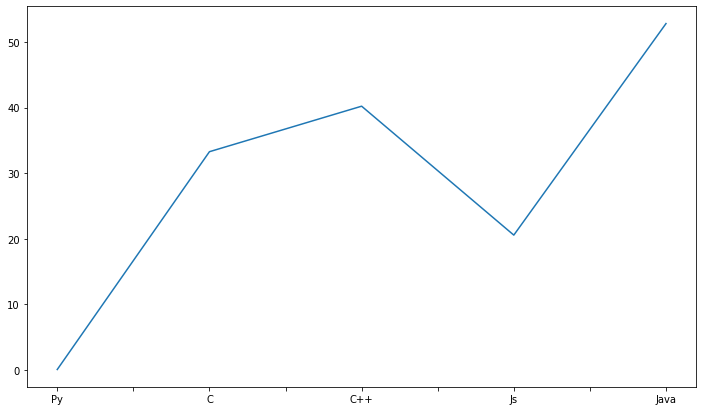

In [ ]:
df["Average"].plot()

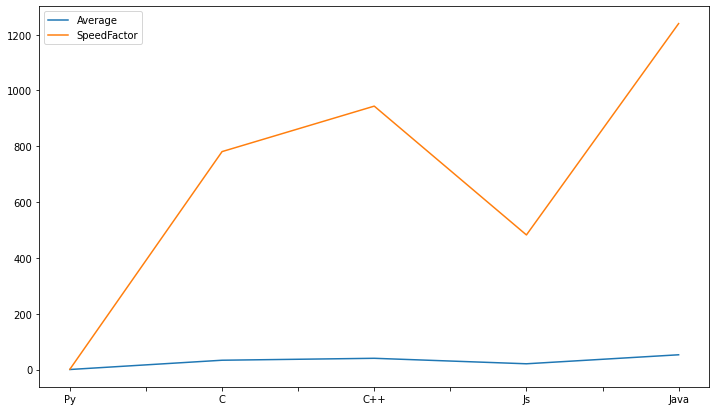

In [ ]:
df.plot()

# Avocado own example - Colombian Wheat example 
8. Include an analysis similar to the one performed with the avocados data using any data set

**My own example 21**

In [18]:
# Got .xlsx File about wheat exportations from Colombia to US from: 
# https://apps.fas.usda.gov/esrquery/esrq.aspx

#Clean it 

#Install extension from pandas to read the file 

#Optional: In the repository of this laboratory is also the Data.xlsx file to upload it in Collab

In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import pandas as pd

df = pd.read_excel('Data.xlsx')

print(df)

     Unnamed: 0  Unnamed: 1 Unnamed: 2 Unnamed: 3           Unnamed: 4  \
0           NaN         NaN  Commodity        NaN                 Date   
1           NaN         0.0        NaN  All Wheat  2020-08-06 00:00:00   
2           NaN         1.0        NaN  All Wheat  2020-08-13 00:00:00   
3           NaN         2.0        NaN  All Wheat  2020-08-20 00:00:00   
4           NaN         3.0        NaN  All Wheat  2020-08-27 00:00:00   
..          ...         ...        ...        ...                  ...   
102         NaN       103.0        NaN  All Wheat  2022-07-14 00:00:00   
103         NaN       104.0        NaN  All Wheat  2022-07-21 00:00:00   
104         NaN       105.0        NaN  All Wheat  2022-07-28 00:00:00   
105         NaN       106.0        NaN  All Wheat  2022-08-04 00:00:00   
106         NaN       107.0        NaN  All Wheat  2022-08-11 00:00:00   

     Unnamed: 5 Unnamed: 6      Unnamed: 7      Unnamed: 8         Unnamed: 9  \
0           NaN    Country  We

In [63]:
#Clean data 
df.rename( columns={'Unnamed: 4':'Date'}, inplace=True )
df.rename( columns={'Unnamed: 6':'Country'}, inplace=True )
df.rename( columns={'Unnamed: 7':'Weekly Exports'}, inplace=True )
df.rename( columns={'Unnamed: 10':'Gross Sales'}, inplace=True )
df = df[["Date", "Country", "Weekly Exports", "Gross Sales"]]
df = df.drop(index = [0])
df

,Date,Country,Weekly Exports,Gross Sales
1,2020-08-06 00:00:00,COLOMBIA,0.0,5000.0
2,2020-08-13 00:00:00,COLOMBIA,0.0,10000.0
3,2020-08-20 00:00:00,COLOMBIA,22767.0,3767.0
4,2020-08-27 00:00:00,COLOMBIA,4809.0,400.0
5,2020-09-03 00:00:00,COLOMBIA,0.0,0.0
...,...,...,...,...
102,2022-07-14 00:00:00,COLOMBIA,0.0,0.0
103,2022-07-21 00:00:00,COLOMBIA,60084.0,5399.0
104,2022-07-28 00:00:00,COLOMBIA,19797.0,1797.0
105,2022-08-04 00:00:00,COLOMBIA,31540.0,900.0


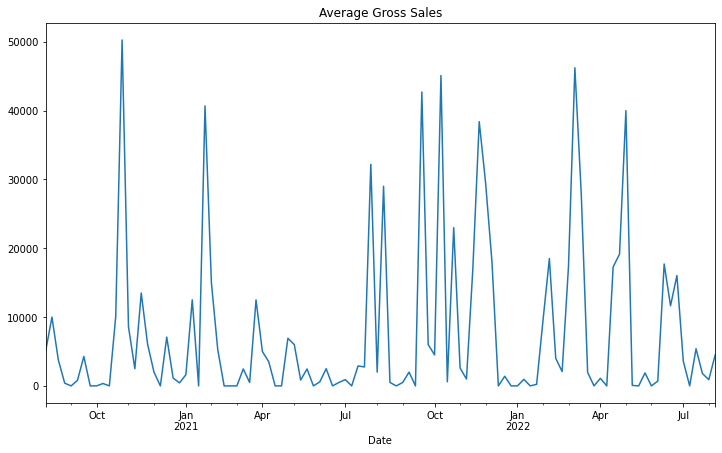

In [64]:
df.groupby(['Date'])['Gross Sales'].mean().ffill().plot();
plt.gca().set_title("Average Gross Sales");

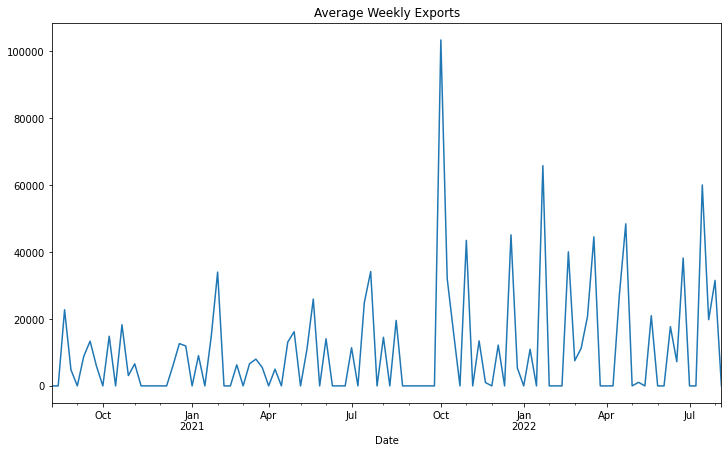

In [65]:
df.groupby(['Date'])['Weekly Exports'].mean().ffill().plot();
plt.gca().set_title("Average Weekly Exports");

In [73]:
#Country corr, as we have only one so Corr must be 1 

country_corr = df.set_index(['Date', 'Country'])['Gross Sales'].unstack(level=['Country']).ffill().groupby(level='Country', axis=1).corr()
country_corr

Country,COLOMBIA
Country,
COLOMBIA,1.0


# Thanks!